<a href="https://colab.research.google.com/github/Bookmaster9/watlowintern/blob/DeepLearning/deeplearningattemp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv('/content/gdrive/MyDrive/fullyprocessedv2.csv')
data.head()
labels = np.array(data["Cycles_until_failure"])
features = np.array(data.iloc[:,3:4])
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Training Features Shape: (1676351, 1)
Training Labels Shape: (1676351,)
Testing Features Shape: (419088, 1)
Testing Labels Shape: (419088,)


In [ ]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LV Input (VAC),1676351.0,1.521491e+02,1.751388e+02,0.008032,0.868823,6.187595,358.768560,3.942105e+02
HV Input (VAC),1676351.0,2.703055e+02,1.648690e+02,-0.699985,2.724280,370.568680,373.072970,4.446040e+02
Current (AAC),1676351.0,6.425959e+02,1.697676e+03,-10.464776,0.016499,5.448534,5.581219,5.642414e+03
Leakage (MA),1676351.0,8.191685e+01,1.857786e+02,0.031336,1.201815,1.303688,1.804098,7.723680e+02
sn side 10 in (C),1676351.0,9.449095e+32,3.058516e+35,0.002000,406.346000,444.996000,482.909000,9.900000e+37
sn side 5 in (C),1676351.0,4.516761e+02,2.034248e+02,0.001000,496.178000,531.617000,564.365000,1.299615e+03
center (C),1676351.0,4.750552e+02,2.512750e+02,0.002000,363.959500,559.564000,594.924500,1.146392e+03
side 5 in (C),1676351.0,4.485251e+02,2.369901e+02,0.001000,373.768480,571.442000,602.708000,8.828200e+02
side 10 in (C),1676351.0,4.613259e+02,2.182318e+02,-0.723645,370.974070,568.065000,599.716000,6.713870e+02
HV Out (VAC),1676351.0,3.991439e+03,2.478785e+03,-10.818493,24.423091,5529.191429,5567.382518,6.637937e+03


In [ ]:
import tensorflow.keras.backend as K
def Lawrence_accuracy(y_true, y_pred):
    # print('first')
    y = tf.convert_to_tensor(100.0)
    z = tf.convert_to_tensor(-100.0)
    # print('second')
    upper = tf.math.add(y_true,y)
    lower = tf.math.add(y_true,z)
    # print('third')
    upperthreshold = tf.cast(upper, tf.float32)
    lowerthreshold = tf.cast(lower, tf.float32)
    #print('fourth')
    # print(upperthreshold)
    # print(lowerthreshold)
    # print('fifth')
    test1 = tf.math.less(y_pred, upperthreshold)
    # print('sixth')
    test2 = tf.math.greater(y_pred, lowerthreshold)
    # print('seventh')
    accuracy = tf.cast(tf.equal(test1, test2), tf.float32)
    # print('eighth')
    return accuracy


In [ ]:
def accuracy(y_true, y_pred):
  [y_pred, y_true], _ = \
      metrics_utils.ragged_assert_compatible_and_get_flat_values(
          [y_pred, y_true])
  y_true.shape.assert_is_compatible_with(y_pred.shape)
  if y_true.dtype != y_pred.dtype:
    y_pred = tf.cast(y_pred, y_true.dtype)
  y = tf.convert_to_tensor(100.0)
  z = tf.convert_to_tensor(-100.0)
  upperthreshold = tf.cast(upper, tf.float32)
  lowerthreshold = tf.cast(lower, tf.float32)
  test1 = tf.math.less(y_pred, upperthreshold)
  test2 = tf.math.greater(y_pred, lowerthreshold)
  return tf.cast(tf.equal(test1, test2), backend.floatx())

In [ ]:
num1 = tf.constant(5, tf.float32)
num2 = tf.constant(100, tf.float32)
a = Lawrence_accuracy(num1, num2)
print(a, type(a))

tf.Tensor(1.0, shape=(), dtype=float32) <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))


In [ ]:
print(train_features[:100])

[[1.36942900e+00]
 [7.03450000e-02]
 [1.35472050e+00]
 [1.40971750e+00]
 [1.35772600e+00]
 [1.21620450e+00]
 [1.44252400e+00]
 [1.17872950e+00]
 [1.27452500e-01]
 [1.30854850e+00]
 [1.36616750e+00]
 [2.35690000e+01]
 [1.28520650e+00]
 [1.87764050e+00]
 [1.40332250e+00]
 [1.43958200e+00]
 [1.25412700e+00]
 [5.07125000e-02]
 [1.16082350e+00]
 [1.21064050e+00]
 [1.24255200e+00]
 [5.18058000e+02]
 [1.32076300e+00]
 [1.21160000e+00]
 [6.47815000e-02]
 [1.41003700e+00]
 [1.28200900e+00]
 [2.28590000e+01]
 [1.23769150e+00]
 [1.20808250e+00]
 [6.26070000e-02]
 [1.56716250e+00]
 [1.24856300e+00]
 [1.31129800e+00]
 [1.13601100e+00]
 [1.41118850e+00]
 [1.24172050e+00]
 [1.37096350e+00]
 [1.26519000e+00]
 [1.31347250e+00]
 [8.13445000e-02]
 [2.33700000e+01]
 [1.24152850e+00]
 [5.92923000e+02]
 [5.13520000e-02]
 [1.28149750e+00]
 [1.29940350e+00]
 [6.19655000e+02]
 [8.54375000e-02]
 [1.94304575e+00]
 [1.18263050e+00]
 [1.21505350e+00]
 [1.44476200e+00]
 [1.22598900e+00]
 [1.38337000e+00]
 [1.182502

In [ ]:
def build_and_compile_model():
    model = keras.Sequential([
    layers.Dense(64, input_shape = (16,), activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics = ['accuracy'])

    return model

In [ ]:
model1 = build_and_compile_model()
model1.summary()
model1.output_shape

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1088      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


(None, 1)

In [ ]:
dnn = model1.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=1)

ValueError: ignored

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

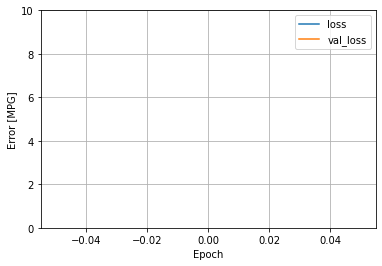

In [ ]:
plot_loss(dnn)

In [ ]:
predictedvalues = model1.predict(test_features).flatten()
count = 0
for i in range(len(test_labels)):
  if predictedvalues[i]> (test_labels[i] - 1000) and predictedvalues[i] < (test_labels[i] +1000):
    count +=1
print(count/len(test_labels))
# a = pd.DataFrame()
# a['test_labels'] = test_labels
# a['pred_labels'] = predictedvalues
# a.to_csv('/content/gdrive/MyDrive/firstdeeplearning.csv')

0.0


In [ ]:
print(predictedvalues)

[nan nan nan ... nan nan nan]


https://www.tensorflow.org/tutorials/keras/regression#regression_using_a_dnn_and_multiple_inputs 